In [2]:
import numpy as np
import pandas as pd

In [3]:
raw_data = pd.read_csv("bank-full.csv")

In [4]:
main_column_name = raw_data.columns[0].replace("\"","").split(";")

In [5]:
def col_cleaner(x):
    x = x[0].replace('"','')
    x = x.split(";")
    return x

column_data = raw_data.values.tolist()
column_data = [col_cleaner(x) for x in column_data]

In [6]:
column_data[0][1]

'management'

In [7]:
df = pd.DataFrame(data=column_data,columns=main_column_name)

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [13]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [14]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [17]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,77,12,3,4,2,7168,2,2,3,31,12,1573,48,559,41,4,2
top,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no
freq,2085,9732,27214,23202,44396,3514,25130,37967,29285,2752,13766,188,17544,36954,36954,36959,39922


In [18]:
#Encoding all Categorical Values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [19]:
cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

In [20]:
for x in cols:
        df[x] = le.fit_transform(df[x])

In [21]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [22]:
import seaborn as sns

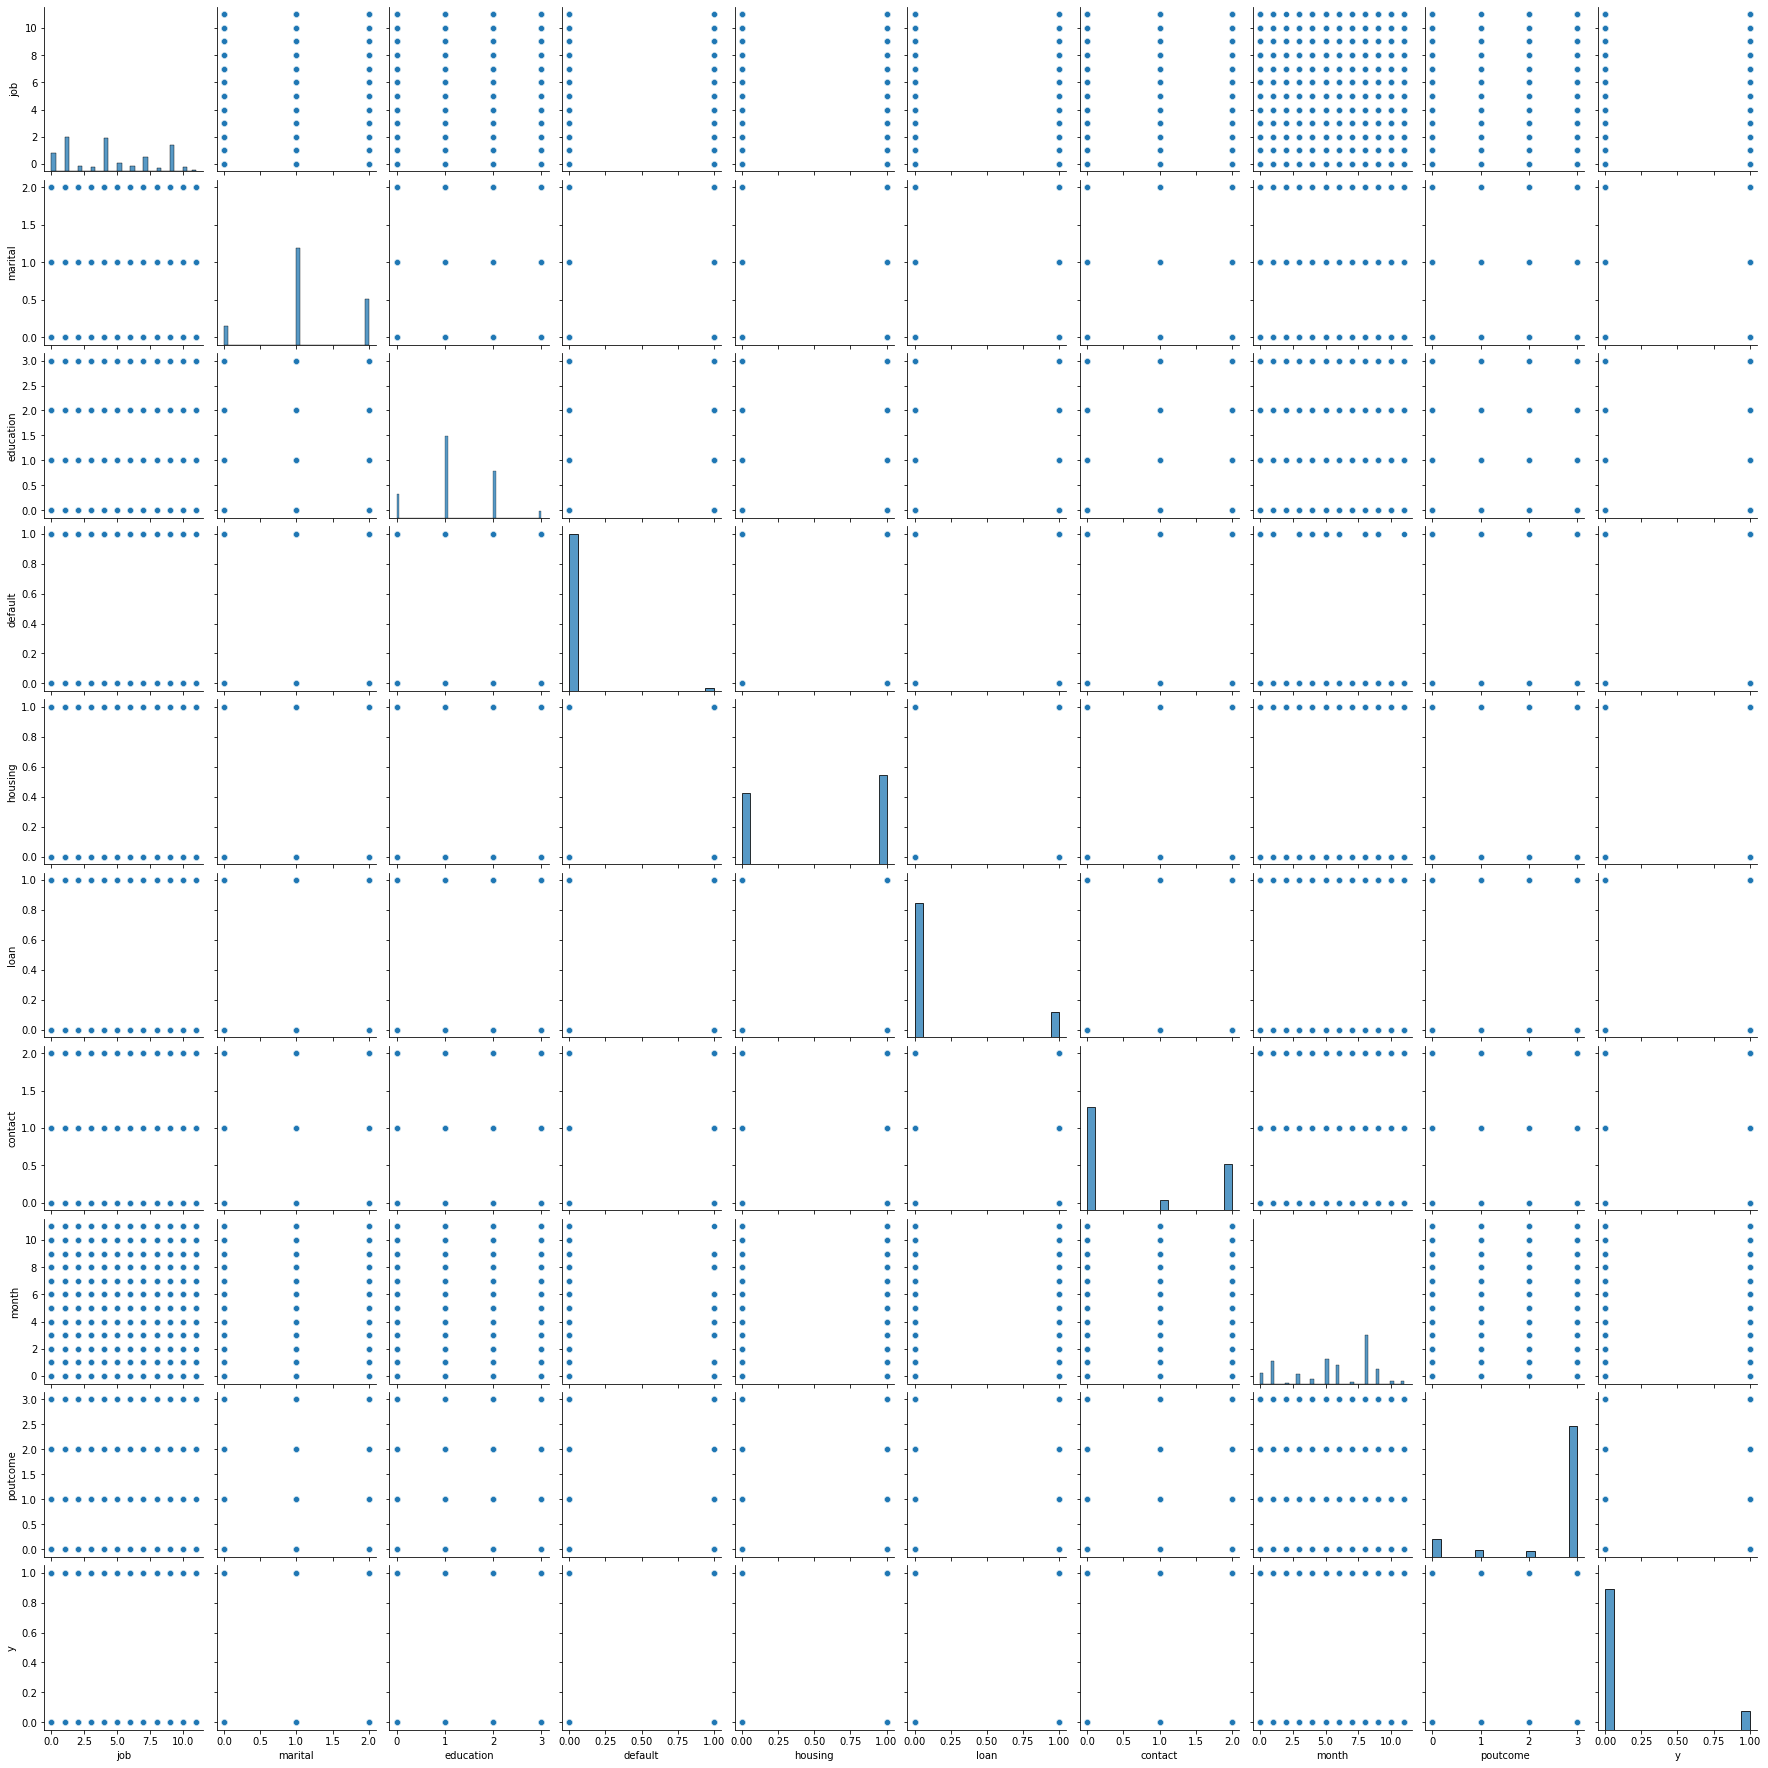

In [23]:
sns.pairplot(df)

In [35]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [36]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [37]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [38]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.80, random_state=50)

In [39]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [65]:
from sklearn.metrics import accuracy_score
y_pred = LR.predict(X_test)
print(LR.score(X_test,y_test))

0.21126373256065611


In [81]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline 
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [82]:
pipelines = {
    'RF':make_pipeline(StandardScaler(),RandomForestClassifier()),
    'MLP':make_pipeline(StandardScaler(),MLPClassifier()),
    'DTR':make_pipeline(StandardScaler(),DecisionTreeClassifier()),
    #'MNB':make_pipeline(StandardScaler(),MultinomialNB()),
    'SGD':make_pipeline(StandardScaler(),SGDClassifier()),
    'KNN':make_pipeline(StandardScaler(),KNeighborsClassifier()),
}

In [83]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [84]:
fit_models

{'RF': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'MLP': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('mlpclassifier', MLPClassifier())]),
 'DTR': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier', DecisionTreeClassifier())]),
 'SGD': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdclassifier', SGDClassifier())]),
 'KNN': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier())])}

In [86]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    #print(algo," => ",mean_absolute_error(y_test, yhat)," => ", mean_squared_error(y_test,yhat))
    print(algo," => ",accuracy_score(y_test,yhat))

RF  =>  0.9003290110315464
MLP  =>  0.8948270618485443
DTR  =>  0.866930244131715
SGD  =>  0.8859797063783903
KNN  =>  0.8907628079294423


In [129]:
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.layers import Input

In [126]:
y_train.shape

(9042,)

In [139]:
ann = models.Sequential()
ann.add(Input(shape=x_2.shape[1]))
ann.add(layers.Dense(128, activation='relu'))
ann.add(layers.Dense(64, activation='relu'))
ann.add(layers.Dense(16, activation='relu'))
ann.add(layers.Dense(1, activation='sigmoid'))

In [140]:
ann.build()
ann.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 128)               2176      
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 16)                1040      
                                                                 
 dense_22 (Dense)            (None, 1)                 17        
                                                                 
Total params: 11,489
Trainable params: 11,489
Non-trainable params: 0
_________________________________________________________________


In [141]:
x_2 = np.asarray(X_train).astype(np.float32)
y_2 = np.asarray(y_train).astype(np.float32)

In [142]:
print(x_2.shape)
print(y_2.shape)

(9042, 16)
(9042,)


In [143]:
ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [144]:
hist = ann.fit(x_2,y_2,epochs=50,batch_size=10, validation_split=0.2)

Epoch 1/50
724/724 [==============================] - 3s 3ms/step - loss: 3.0818 - accuracy: 0.8158 - val_loss: 0.5670 - val_accuracy: 0.7844
Epoch 2/50
724/724 [==============================] - 2s 2ms/step - loss: 0.7386 - accuracy: 0.8552 - val_loss: 0.3054 - val_accuracy: 0.8867
Epoch 3/50
724/724 [==============================] - 2s 2ms/step - loss: 0.5647 - accuracy: 0.8619 - val_loss: 0.3149 - val_accuracy: 0.8933
Epoch 4/50
724/724 [==============================] - 2s 2ms/step - loss: 0.4058 - accuracy: 0.8718 - val_loss: 0.4208 - val_accuracy: 0.8955
Epoch 5/50
724/724 [==============================] - 2s 3ms/step - loss: 0.3655 - accuracy: 0.8789 - val_loss: 0.2842 - val_accuracy: 0.8939
Epoch 6/50
724/724 [==============================] - 2s 2ms/step - loss: 0.3335 - accuracy: 0.8822 - val_loss: 0.2866 - val_accuracy: 0.8961
Epoch 7/50
724/724 [==============================] - 2s 2ms/step - loss: 0.3341 - accuracy: 0.8814 - val_loss: 0.3054 - val_accuracy: 0.8911
Epoch 

In [147]:
hist_df = pd.DataFrame(hist.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.head()

,epoch,loss,accuracy,val_loss,val_accuracy
0,1,3.08,0.82,0.57,0.78
1,2,0.74,0.86,0.31,0.89
2,3,0.56,0.86,0.31,0.89
3,4,0.41,0.87,0.42,0.90
4,5,0.37,0.88,0.28,0.89


In [150]:
import matplotlib.pyplot as plt

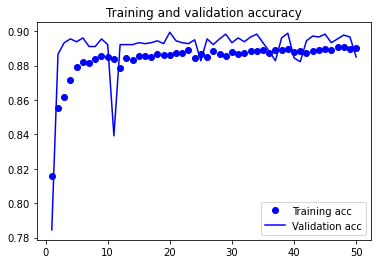

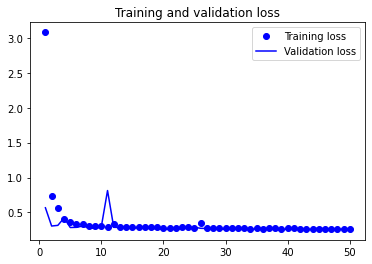

In [151]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()